In [2]:
# ==========================
# Mount Google Drive
# ==========================
from google.colab import drive
import os

drive.mount('/content/drive')

# ==========================
# Set Base Path
# ==========================
base_path = "/content/drive/MyDrive/Healthcare_EDA_Projects"

# Project name
project_name = "diabetes"

# Full path for this project
project_path = os.path.join(base_path, project_name)

# Folder paths
raw_path = os.path.join(project_path, "data", "raw")
processed_path = os.path.join(project_path, "data", "processed")
notebooks_path = os.path.join(project_path, "notebooks")
reports_path = os.path.join(project_path, "reports")
figures_path = os.path.join(reports_path, "figures")

# ==========================
# Create Folders
# ==========================
folders = [raw_path, processed_path, notebooks_path, reports_path, figures_path]
for folder in folders:
    os.makedirs(folder, exist_ok=True)

# ==========================
# Create Empty Files
# ==========================
files = [
    os.path.join(reports_path, "README.md"),
    os.path.join(project_path, "requirements.txt"),
    os.path.join(project_path, "LICENSE"),
    os.path.join(project_path, ".gitignore"),
    os.path.join(project_path, "README.md")
]
for file in files:
    open(file, 'a').close()

print(f"✅ Project structure created at: {project_path}")


Mounted at /content/drive
✅ Project structure created at: /content/drive/MyDrive/Healthcare_EDA_Projects/diabetes


In [3]:
# =====================================
# 📌 Project: Diabetes EDA
# =====================================

In [4]:
# ========================
# Setup & Imports
# ========================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Set visual style
sns.set(style="whitegrid")


In [5]:
# ========================
# Problem Statement
# ========================
"""
GOAL:
Explore the Pima Indians Diabetes dataset to identify patterns,
relationships, and possible risk factors associated with diabetes.

QUESTIONS TO ANSWER:
1. Which features differ most between diabetic & non-diabetic patients?
2. Are there missing or impossible values in the data?
3. Are there correlations between features?
"""

'\nGOAL:\nExplore the Pima Indians Diabetes dataset to identify patterns,\nrelationships, and possible risk factors associated with diabetes.\n\nQUESTIONS TO ANSWER:\n1. Which features differ most between diabetic & non-diabetic patients?\n2. Are there missing or impossible values in the data?\n3. Are there correlations between features?\n'

In [6]:
# ========================
# Load Dataset
# ========================
# Upload manually
from google.colab import files
uploaded = files.upload()  # Upload diabetes.csv here

# Save raw data
df_raw = pd.read_csv("diabetes.csv")
df_raw.to_csv(os.path.join(raw_path, "diabetes.csv"), index=False)  # Save to Drive

print("\n--- First 5 rows ---\n")
print(df_raw.head())

Saving diabetes.csv to diabetes.csv

--- First 5 rows ---

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  



--- Dataset Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

--- Summary Stats ---

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.10

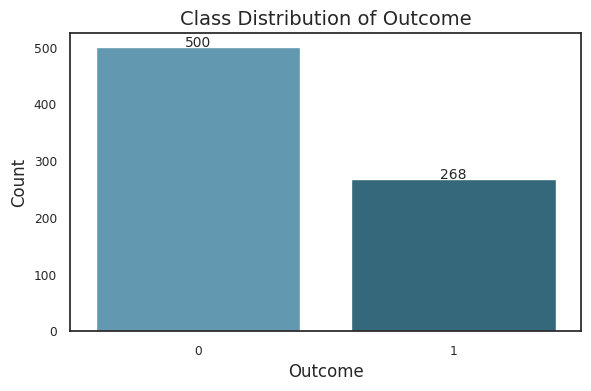

In [29]:
# ========================
# Basic Info & Summary
# ========================
print("\n--- Dataset Info ---\n")
df_raw.info()
print("\n--- Summary Stats ---\n")
print(df_raw.describe())

print("\n--- Class Distribution ---\n")
print(df_raw['Outcome'].value_counts())

# Class Distribution - Bar Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df_raw, palette='PuBuGn_d')

# Add value labels on top of bars
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.2,
             f'{int(p.get_height())}', ha='center', fontsize=10)

plt.title('Class Distribution of Outcome', fontsize=14)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

plt.savefig(os.path.join(figures_path, "class_distribution.png"))
plt.show()
plt.close()


--- Missing Values ---

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


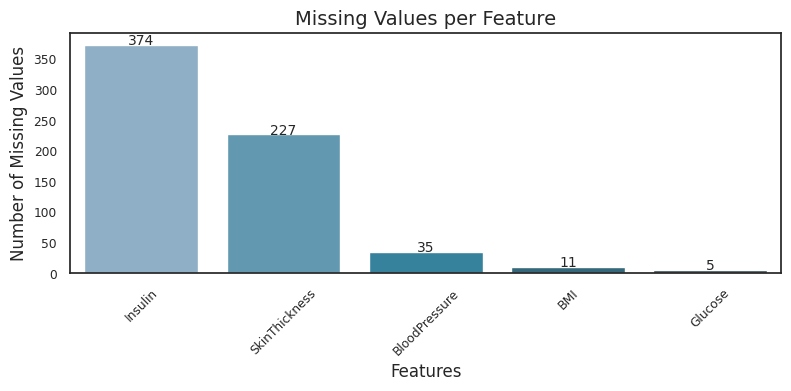

✅ Processed data saved to: /content/drive/MyDrive/Healthcare_EDA_Projects/diabetes/data/processed/diabetes_processed.csv


In [30]:
# ========================
# Data Cleaning
# ========================

# Copy raw data to processed data
df_processed = df_raw.copy()

# Replace zeros with NaN in specific columns
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_processed[cols_with_zeros] = df_processed[cols_with_zeros].replace(0, np.nan)

print("\n--- Missing Values ---\n")
print(df_processed.isnull().sum())

# Missing Values - Bar Plot
missing_values = df_processed.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='PuBuGn_d')

# Add value labels
for i, v in enumerate(missing_values.values):
    plt.text(i, v + 0.2, str(v), ha='center', fontsize=10)

plt.title('Missing Values per Feature', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(os.path.join(figures_path, "missing_values.png"))
plt.show()
plt.close()

# Fill missing values with median
df_processed['BMI'] = df_processed['BMI'].fillna(df_processed['BMI'].median())
df_processed['Glucose'] = df_processed['Glucose'].fillna(df_processed['Glucose'].median())

# Save processed data to Drive
df_processed.to_csv(os.path.join(processed_path, "diabetes_processed.csv"), index=False)

print(f"✅ Processed data saved to: {os.path.join(processed_path, 'diabetes_processed.csv')}")

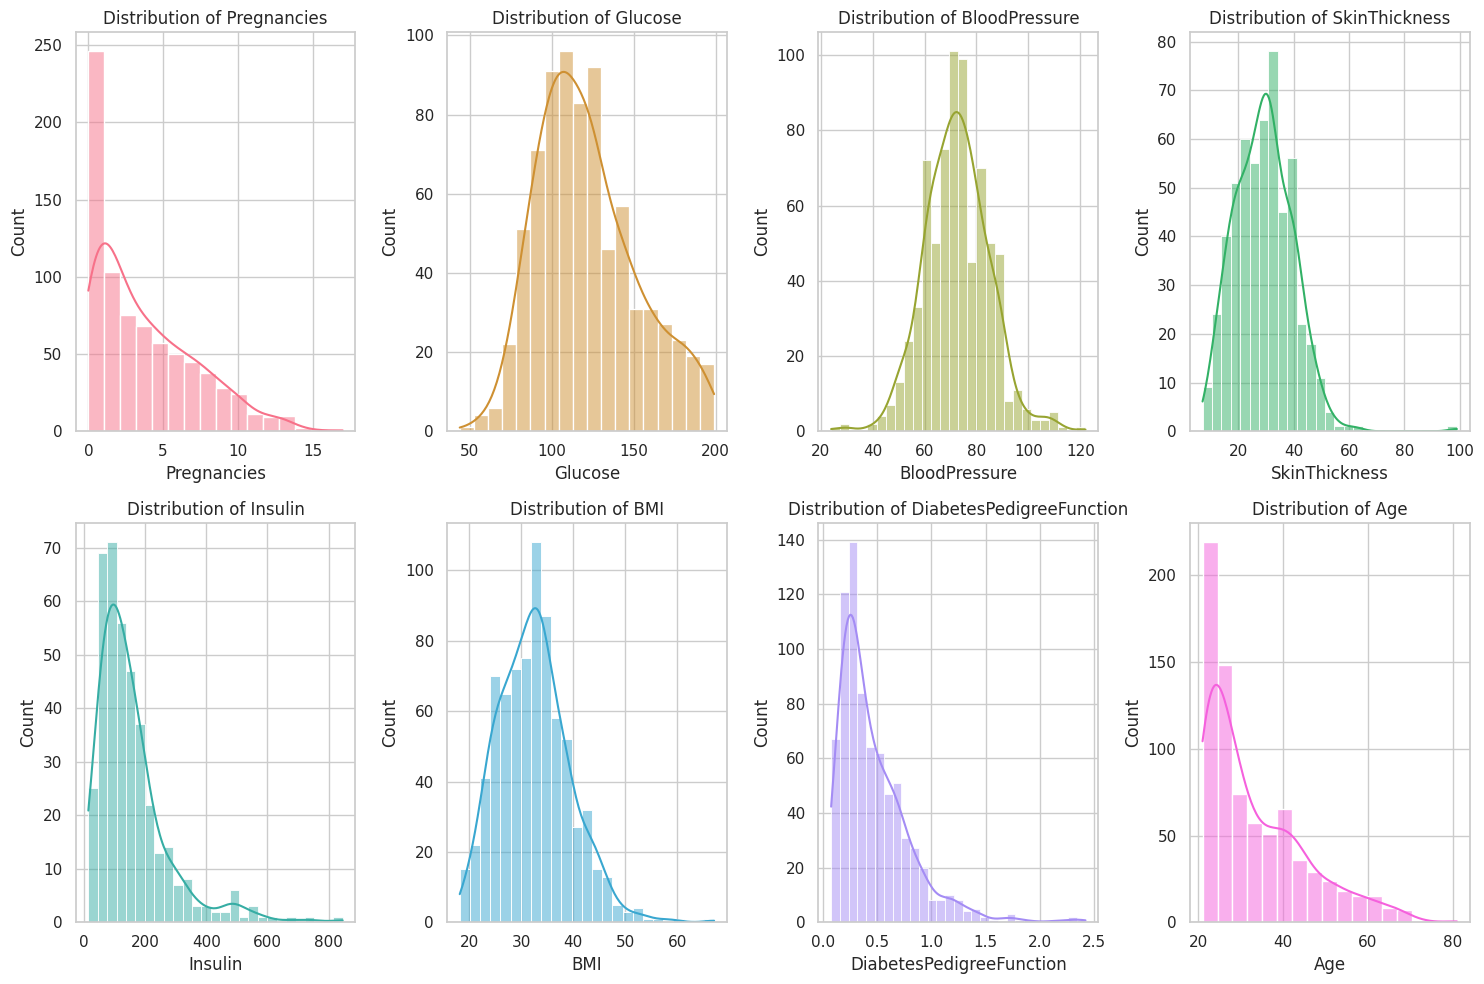

NOTE: Glucose (mg/dL), Blood Pressure (mm Hg), Skin Thickness (mm), Insulin (μU/mL), BMI (kg/m²), Diabetes Pedigree Function (unitless), Age (years).


In [10]:
# ========================
# Univariate Analysis
# ========================

# Generate different colors
colors = sns.color_palette("husl", len(df_processed.columns[:-1]))

# Create subplots
n_cols = 4  # number of plots per row
n_rows = int(np.ceil(len(df_processed.columns[:-1]) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(df_processed.columns[:-1]):
    # Skip column if all NaN or empty
    if df_processed[col].dropna().empty:
        print(f"Skipping {col} - all values are NaN")
        continue

    sns.histplot(df_processed[col], kde=True, ax=axes[idx], color=colors[idx])
    axes[idx].set_title(f"Distribution of {col}")

# Remove empty subplot spaces
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(os.path.join(figures_path, "distributions.png"))
plt.tight_layout()
plt.show()
plt.close()

note = "NOTE: Glucose (mg/dL), Blood Pressure (mm Hg), Skin Thickness (mm), Insulin (μU/mL), BMI (kg/m²), Diabetes Pedigree Function (unitless), Age (years)."
print(note)


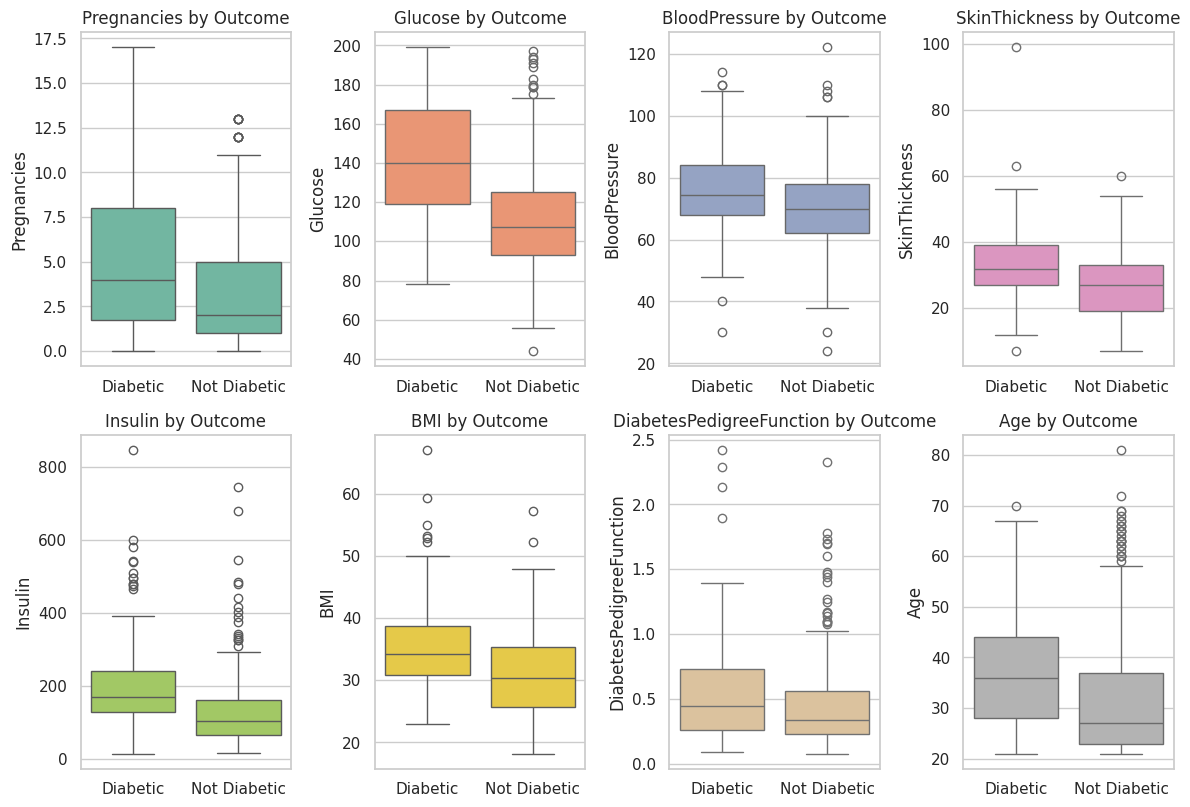

NOTE: Glucose (mg/dL), Blood Pressure (mm Hg), Skin Thickness (mm), Insulin (μU/mL), BMI (kg/m²), Diabetes Pedigree Function (unitless), Age (years).


In [11]:
# ========================
# Bivariate Analysis
# ========================
# Map Outcome values
df_processed['Outcome_label'] = df_processed['Outcome'].map({0: 'Not Diabetic', 1: 'Diabetic'})

# Define colors for each plot
colors = sns.color_palette("Set2", len(df_processed.drop(columns=['Outcome', 'Outcome_label']).columns))

# Create subplots
cols = df_processed.drop(columns=['Outcome', 'Outcome_label']).columns
fig, axes = plt.subplots(nrows=len(cols)//2 + len(cols)%2, ncols=4, figsize=(12, len(cols)*2))

axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(
        x='Outcome_label',
        y=col,
        data=df_processed,
        ax=axes[i],
        palette={'Not Diabetic': colors[i], 'Diabetic': colors[i]}
    )
    axes[i].set_title(f"{col} by Outcome", fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(os.path.join(figures_path, "all_boxplots_by_outcome.png"))
plt.show()
plt.close()

note = "NOTE: Glucose (mg/dL), Blood Pressure (mm Hg), Skin Thickness (mm), Insulin (μU/mL), BMI (kg/m²), Diabetes Pedigree Function (unitless), Age (years)."
print(note)

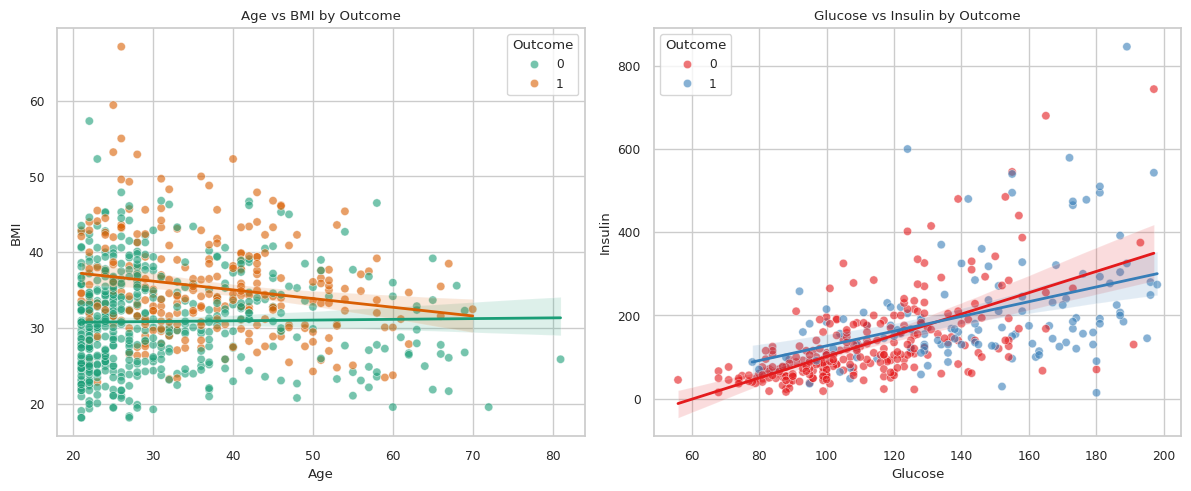

In [44]:
# ==============================
# MULTIVARIATE ANALYSIS
# ==============================

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Age vs BMI ---
sns.scatterplot(
    data=df_processed,
    x='Age', y='BMI',
    hue='Outcome',
    palette='Dark2',
    alpha=0.6,
    ax=axes[0]
)
sns.regplot(
    data=df_processed[df_processed['Outcome'] == 0],
    x='Age', y='BMI',
    scatter=False,
    color=sns.color_palette('Dark2')[0],
    line_kws={"linewidth": 2},
    ax=axes[0]
)
sns.regplot(
    data=df_processed[df_processed['Outcome'] == 1],
    x='Age', y='BMI',
    scatter=False,
    color=sns.color_palette('Dark2')[1],
    line_kws={"linewidth": 2},
    ax=axes[0]
)
axes[0].set_title("Age vs BMI by Outcome")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("BMI")

# --- Glucose vs Insulin ---
sns.scatterplot(
    data=df_processed,
    x='Glucose', y='Insulin',
    hue='Outcome',
    palette='Set1',
    alpha=0.6,
    ax=axes[1]
)
sns.regplot(
    data=df_processed[df_processed['Outcome'] == 0],
    x='Glucose', y='Insulin',
    scatter=False,
    color=sns.color_palette('Set1')[0],
    line_kws={"linewidth": 2},
    ax=axes[1]
)
sns.regplot(
    data=df_processed[df_processed['Outcome'] == 1],
    x='Glucose', y='Insulin',
    scatter=False,
    color=sns.color_palette('Set1')[1],
    line_kws={"linewidth": 2},
    ax=axes[1]
)
axes[1].set_title("Glucose vs Insulin by Outcome")
axes[1].set_xlabel("Glucose")
axes[1].set_ylabel("Insulin")

plt.tight_layout()
plt.savefig(os.path.join(figures_path, "multivariate.png"))
plt.show()
plt.close()

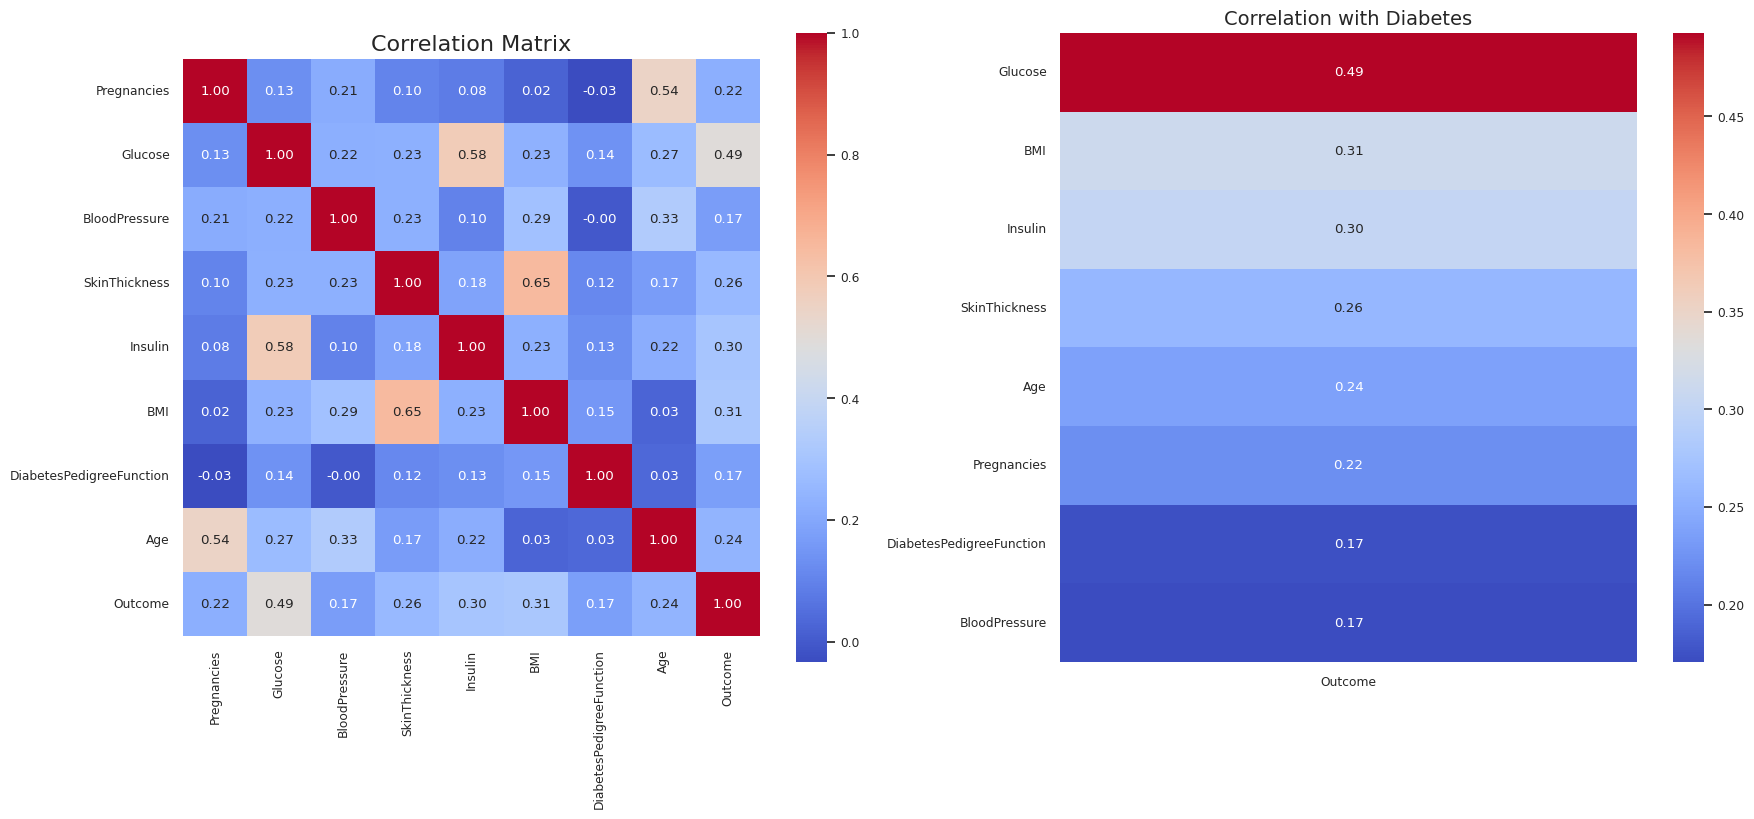

In [28]:
# ========================
# Correlation Analysis
# ========================

# Keep only numeric columns for correlation
numeric_df = df_processed.select_dtypes(include=['number'])

# Calculate correlation matrix
corr = numeric_df.corr()

# Target Correlation with 'Outcome'
target_corr_sorted = corr['Outcome'].drop('Outcome').sort_values(ascending=False)

# Set style
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot full correlation matrix
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, ax=axes[0])
axes[0].set_title("Correlation Matrix", fontsize=16)

# Plot target correlation
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f',
            cbar=True, ax=axes[1])
axes[1].set_title('Correlation with Diabetes', fontsize=14)

plt.tight_layout()
plt.savefig(os.path.join(figures_path, "correlation.png"))
plt.show()
plt.close()

In [ ]:
# ========================
# Key Insights
# ========================
"""
INSIGHTS:
- Patients with diabetes tend to have higher glucose and BMI values.
- Missing values are mostly in Insulin measurements (~50%).
- Glucose has the highest positive correlation with diabetes outcome (r ≈ 0.49).
"""